In [1]:
# importing libraries 
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
nfl = pd.read_csv('season_2021.csv')

# inspect first few rows
nfl.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Arizona Cardinals,1,Sun,September 12,W,Tennessee Titans,38,13,22,416,280,136,1,17,248,162,86,3
1,Arizona Cardinals,2,Sun,September 19,W,Minnesota Vikings,34,33,21,474,371,103,2,22,419,242,177,0
2,Arizona Cardinals,3,Sun,September 26,W,Jacksonville Jaguars,31,19,23,407,316,91,1,20,361,202,159,4
3,Arizona Cardinals,4,Sun,October 3,W,Los Angeles Rams,37,20,27,465,249,216,0,24,401,280,121,2
4,Arizona Cardinals,5,Sun,October 10,W,San Francisco 49ers,17,10,20,304,210,94,1,19,338,186,152,1


In [3]:
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team_name      570 non-null    object
 1   week           570 non-null    object
 2   day            570 non-null    object
 3   date           570 non-null    object
 4   result         570 non-null    object
 5   opponent       570 non-null    object
 6   tm_score       570 non-null    int64 
 7   opp_score      570 non-null    int64 
 8   1stD_offense   570 non-null    int64 
 9   TotYd_offense  570 non-null    int64 
 10  PassY_offense  570 non-null    int64 
 11  RushY_offense  570 non-null    int64 
 12  TO_offense     570 non-null    int64 
 13  1stD_defense   570 non-null    int64 
 14  TotYd_defense  570 non-null    int64 
 15  PassY_defense  570 non-null    int64 
 16  RushY_defense  570 non-null    int64 
 17  TO_defense     570 non-null    int64 
dtypes: int64(12), object(6)
memory

## summarizing the outcome

In [4]:
nfl['result'].value_counts()

W    284
L    284
T      2
Name: result, dtype: int64

## Encoding the result labels


In [5]:
# nested dictionary to encode letters to numeric variables
result_encoder = {'result':{'W':1, 'T':0, 'L':0}}

# encode the result column using encoder
nfl.replace(result_encoder, inplace=True)
# check the value counts now
nfl['result'].value_counts()

0    286
1    284
Name: result, dtype: int64

## Visualize the stats
- Exploring trends in the stats to predict wins. 

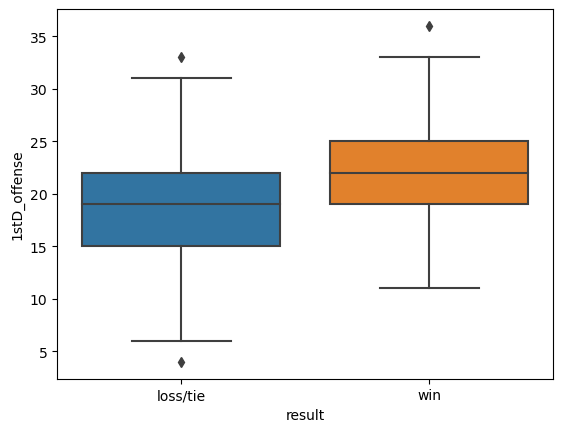

Index(['1stD_offense', 'TotYd_offense', 'PassY_offense', 'RushY_offense',
       'TO_offense', '1stD_defense', 'TotYd_defense', 'PassY_defense',
       'RushY_defense', 'TO_defense'],
      dtype='object')


In [6]:
stats = '1stD_offense'

stats_plot = sns.boxplot(x='result', y=stats, data=nfl)

# plot labels
stats_plot.set_xticklabels(['loss/tie','win'])
plt.show()

# list feature names
print(nfl.columns[8:])

# change stat to view plot
stat = '1stD_offense'


### Is your offense’s strong point in the air (passing) or on the ground (rushing)?

In [7]:
# getting the passing and rushing yards 
passing_yards = nfl['PassY_offense']
rushing_yards = nfl['RushY_offense']

# comparing the two columns
if passing_yards.any() > rushing_yards.any():
    print('Offense is stronger.')
else:
    print('Defense is stronger')

Defense is stronger


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


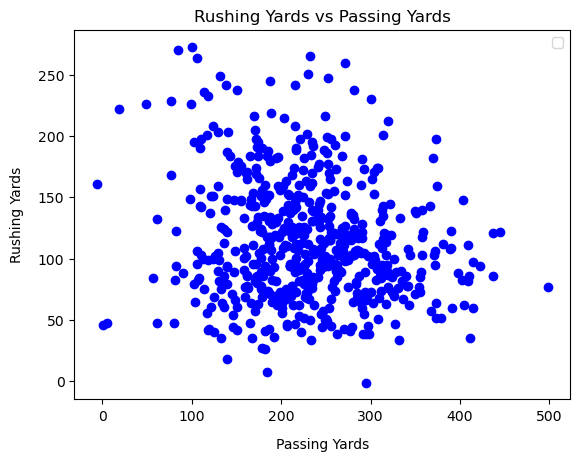

In [8]:
# create a scatter plot
plt.scatter(nfl['PassY_offense'], nfl['RushY_offense'], color='blue')
plt.xlabel('Passing Yards', labelpad=10)
plt.ylabel('Rushing Yards',labelpad=10)
plt.title('Rushing Yards vs Passing Yards')
plt.legend()

# adding annotations
plt.annotate('Team with most rushing yards',xy=(1000,1500),ha='left',va='top')

plt.show()

## Data Preparation

### Standardize features


In [9]:
# select the feature variables to be scaled 
features = nfl.iloc[:,8:]
scaler = StandardScaler()

# fit the transformer to the features
scaler.fit(features)

# transform and save as X
X = scaler.transform(features)

In [10]:
print(features)

     1stD_offense  TotYd_offense  PassY_offense  RushY_offense  TO_offense  \
0              22            416            280            136           1   
1              21            474            371            103           2   
2              23            407            316             91           1   
3              27            465            249            216           0   
4              20            304            210             94           1   
..            ...            ...            ...            ...         ...   
565            14            224            124            100           4   
566            14            237            174             63           0   
567            14            257            172             85           2   
568            24            312            218             94           1   
569            16            325             99            226           0   

     1stD_defense  TotYd_defense  PassY_defense  RushY_defense 

In [11]:
# save the result varible as y
y = nfl['result']


## Splitting into training and testing data
- training data: using this data to train my model to recognize winning games from patterns in the game stats 
- testing data: using this data to check model accuracy

In [12]:
# creating train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

## Analysis 

In [13]:
# creating the classifier
lrc = LogisticRegression()

# fitting classifier to training data
lrc.fit(X_train,y_train)

LogisticRegression()

In [14]:
# predicting with the classifier using the .predict() function
y_pred = lrc.predict(X_test)

# viewing the model accuracy with the accuracy_score() function
accuracy_score(y_test,y_pred)

0.8280701754385965

## Optimize by tuning hyperparameters
- Improving model performance by seeing how different parameters affect performance. 
- penalty: imposes a regularization penalty on the model for having too many variables. Options are generally l1 and l2
- C: the inverse of regularization strength. It is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting 

In [15]:
# creating a list of penalties 
penalties = ['l1','l2']
# creating a list of values for C
C = [0.01,0.1,1.0,10.0,1000.0]

for penalty in penalties:
    for c in C:
        
        # instantiating the classifier 
        lrc_tuned = LogisticRegression(penalty=penalty, C=c, solver='liblinear')
        # fitting the classifier to training data
        lrc_tuned.fit(X_train,y_train)
        # predicting with the classifier using the .predict() function
        y_pred = lrc_tuned.predict(X_test)

        # view the model accuracy with the accuracy_score() function
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_rd = round(accuracy*100,1)
        
        # print accuracy for each combination of penalty and C
        print(f'Accuracy: {accuracy_rd}% | penalty = {penalty}, C = {c}')

Accuracy: 52.3% | penalty = l1, C = 0.01
Accuracy: 84.6% | penalty = l1, C = 0.1
Accuracy: 83.2% | penalty = l1, C = 1.0
Accuracy: 82.5% | penalty = l1, C = 10.0
Accuracy: 82.5% | penalty = l1, C = 1000.0
Accuracy: 80.4% | penalty = l2, C = 0.01
Accuracy: 83.5% | penalty = l2, C = 0.1
Accuracy: 82.8% | penalty = l2, C = 1.0
Accuracy: 82.5% | penalty = l2, C = 10.0
Accuracy: 82.5% | penalty = l2, C = 1000.0


In [16]:
# optimal penalty and C
penalty = 'l1'
C = 0.1

# create a list of test_sizes
test_sizes = [val/100 for val in range(20,36)]

for test_size in test_sizes:

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # instantiate the classifier
    lrc_tts = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

    # fit the classifier to the training data
    lrc_tts.fit(X_train, y_train)

    # predict with the classifier using the .predict() function
    y_pred = lrc_tts.predict(X_test)

    # view the model accuracy with the accuracy_score() function
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_rd = round(accuracy*100,1)
    
    # print accuracy for each combination of penalty and test size
    print(f'Accuracy: {accuracy_rd}% | test size = {test_size}')

Accuracy: 87.7% | test size = 0.2
Accuracy: 87.5% | test size = 0.21
Accuracy: 87.3% | test size = 0.22
Accuracy: 87.9% | test size = 0.23
Accuracy: 88.3% | test size = 0.24
Accuracy: 88.8% | test size = 0.25
Accuracy: 87.9% | test size = 0.26
Accuracy: 88.3% | test size = 0.27
Accuracy: 88.1% | test size = 0.28
Accuracy: 88.6% | test size = 0.29
Accuracy: 87.1% | test size = 0.3
Accuracy: 87.6% | test size = 0.31
Accuracy: 86.9% | test size = 0.32
Accuracy: 87.3% | test size = 0.33
Accuracy: 86.1% | test size = 0.34
Accuracy: 86.0% | test size = 0.35


In [17]:
# set the test size and hyperparameters
test_size = 0.25
penalty = 'l1'
C = 0.1

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# instantiate the classifier
optLr = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

# fit the classifier to the training data
optLr.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

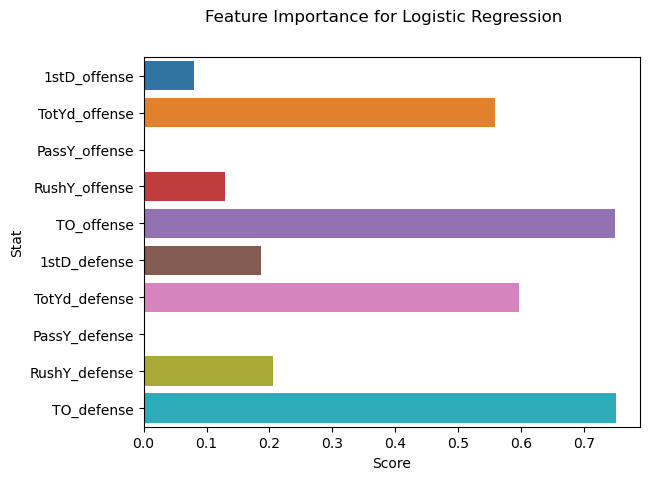

Feature: 1stD_offense, Score: 0.08
Feature: TotYd_offense, Score: 0.56
Feature: PassY_offense, Score: 0.0
Feature: RushY_offense, Score: 0.13
Feature: TO_offense, Score: 0.75
Feature: 1stD_defense, Score: 0.19
Feature: TotYd_defense, Score: 0.6
Feature: PassY_defense, Score: 0.0
Feature: RushY_defense, Score: 0.21
Feature: TO_defense, Score: 0.75


In [18]:
# get importance
importance = abs(optLr.coef_[0])

# visualize feature importance
sns.barplot(x=importance, y=features.columns)

# add labels and titles
plt.suptitle('Feature Importance for Logistic Regression')
plt.xlabel('Score')
plt.ylabel('Stat')
plt.show()


# summarize feature importance
for i,v in enumerate(importance.round(2)):
    print(f'Feature: {features.columns[i]}, Score: {v}')

In [19]:
pip install helper


Note: you may need to restart the kernel to use updated packages.


In [20]:
import requests
from bs4 import BeautifulSoup 
# scrapes data from web pages, using HTML parser, providing python scripts for iterating, searching, and modifying the parse tree


In [21]:
symbols = ['CRD', 'ATL', 'RAV', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GNB', 'HTX', 'CLT', 'JAX', 'KAN', 'RAI', 'SDG', 'RAM', 'MIA', 'MIN', 'NWE', 'NOR', 'NYG', 'NYJ', 'PHI', 'PIT', 'SFO', 'SEA', 'TAM', 'OTI', 'WAS']
team_names = ['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears', 'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys', 'Denver Broncos', 'Detroit Lions', 'Green Bay Packers', 'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars', 'Kansas City Chiefs', 'Las Vegas Raiders', 'Los Angeles Chargers', 'Los Angeles Rams', 'Miami Dolphins', 'Minnesota Vikings', 'New England Patriots', 'New Orleans Saints', 'New York Giants', 'New York Jets', 'Philadelphia Eagles', 'Pittsburgh Steelers', 'San Francisco 49ers', 'Seattle Seahawks', 'Tampa Bay Buccaneers', 'Tennessee Titans', 'Washington Football Team']

In [22]:
def get_new_data(team, year):
    '''
    Function to pull NFL stats from Pro Football Reference (https://www.pro-football-reference.com/).
    
    - team : team name (str)
    - year : year (int)
    '''
    # pull data
    sym = symbols[team_names.index(team)].lower() # used to get the abbreviation for NFL team you specified
    url = f'https://www.pro-football-reference.com/teams/{sym}/{year}.htm' # this creates URL for the site. 
    html = requests.get(url).text 
    # makes a request to the Pro Football website and gets HTML response 
    # requests is used to send a request to the website 
    # text attribute of response object is used to get the HTML content 

    # parse the data
    soup = BeautifulSoup(html,'html.parser')  # parses the HTML response from the Pro Football website. 
    table = soup.find('table', id='games') # gets the game table from HTML response, which contains the data for all the games
    tablerows = table.find_all('tr')[2:] # leaves the first row, which is the headers. 
    data = []         

    for tablerow in tablerows: # loops through all of the rows in the game table 
        data.append([tabledata.get_text(strip=True) for tabledata in tablerow.find_all('td')])

    df = pd.DataFrame(data)


    # subset
    index = [0,1,4,8,9,10] + list(range(11,21))
    new_data = df.iloc[:,index].copy()
    
      # rename columns
    col_names = ['day', 'date', 'result', 'opponent', 'tm_score', 'opp_score', '1stD_offense', 'TotYd_offense', 'PassY_offense', 
'RushY_offense', 'TO_offense', '1stD_defense', 'TotYd_defense', 'PassY_defense', 'RushY_defense', 'TO_defense']
    new_data.columns = col_names

    # encode results
    result_encoder = {'result': {'L': 0, 'T': 0,'W': 1,'' : pd.NA},
                     'TO_offense' : {'' : 0},
                     'TO_defense' : {'' : 0}}
    new_data.replace(result_encoder, inplace=True)

    # remove future dates
    new_data = new_data[new_data.result.notnull()]

    # add week variable back
    week = list(range(1,len(new_data)+1))
    new_data.insert(0, 'week', week)
    
    # add team name
    tn_col = pd.Series([f'{team}']).repeat(len(new_data)).reset_index(drop=True)
    new_data.insert(0, 'team_name', tn_col)

    # return a dataframe object
    if type(new_data) == pd.Series:
        new_data = new_data.to_frame().T
        return new_data.reset_index(drop=True)
    else:
        return new_data.reset_index(drop=True)

In [24]:
# set team abbreviation (in capitals) and year
team = 'Los Angeles Chargers'
year = 2022

# use helper function to pull new data
new_data = get_new_data(team=team, year=year)

# view head of new data
new_data[:17]

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Los Angeles Chargers,1,Sun,September 11,1,Las Vegas Raiders,24,19,18,355,279,76,0,18,320,256,64,3
1,Los Angeles Chargers,2,Thu,September 15,0,Kansas City Chiefs,24,27,21,401,326,75,1,15,319,226,93,0
2,Los Angeles Chargers,3,Sun,September 25,0,Jacksonville Jaguars,10,38,16,312,286,26,2,25,413,262,151,0
3,Los Angeles Chargers,4,Sun,October 2,1,Houston Texans,34,24,22,419,338,81,1,16,346,215,131,2
4,Los Angeles Chargers,5,Sun,October 9,1,Cleveland Browns,30,28,26,465,227,238,0,27,443,230,213,1
5,Los Angeles Chargers,6,Mon,October 17,1,Denver Broncos,19,16,24,297,224,73,1,13,258,160,98,1
6,Los Angeles Chargers,7,Sun,October 23,0,Seattle Seahawks,23,37,21,329,276,53,2,24,404,191,213,2
7,Los Angeles Chargers,8,Sun,November 6,1,Atlanta Falcons,20,17,19,336,245,91,2,19,315,114,201,2
8,Los Angeles Chargers,9,Sun,November 13,0,San Francisco 49ers,16,22,12,238,187,51,1,22,387,230,157,1
9,Los Angeles Chargers,10,Sun,November 20,0,Kansas City Chiefs,27,30,22,365,250,115,2,23,485,322,163,1


In [25]:
# select just the game stats
new_X = new_data.loc[:, features.columns]

# standardize using original data's scaling
new_X_sc = scaler.transform(new_X)

In [26]:
# getting new predictions
new_preds = optLr.predict(new_X_sc)

# get actual results and set the type to float 
new_results = new_data['result'].astype(float)

# getting accuracy score for new data
acc_score = accuracy_score(new_results, new_preds)

In [27]:
# select only game data 
col_names = ['day','date','result','opponent','tm_score','opp_score']
game_data = new_data.loc[:,col_names]

# create comparison table
comp_table = game_data.assign(predicted = new_preds,
                             actual = new_results.astype(int))

In [28]:
print(f'Predicted Wins vs Actual Wins for {team} in {year}')
comp_table

Predicted Wins vs Actual Wins for Los Angeles Chargers in 2022


,day,date,result,opponent,tm_score,opp_score,predicted,actual
0,Sun,September 11,1,Las Vegas Raiders,24,19,1,1
1,Thu,September 15,0,Kansas City Chiefs,24,27,1,0
2,Sun,September 25,0,Jacksonville Jaguars,10,38,0,0
3,Sun,October 2,1,Houston Texans,34,24,1,1
4,Sun,October 9,1,Cleveland Browns,30,28,1,1
5,Mon,October 17,1,Denver Broncos,19,16,1,1
6,Sun,October 23,0,Seattle Seahawks,23,37,0,0
7,Sun,November 6,1,Atlanta Falcons,20,17,0,1
8,Sun,November 13,0,San Francisco 49ers,16,22,0,0
9,Sun,November 20,0,Kansas City Chiefs,27,30,0,0


In [29]:
print(f'\Current Accuracy Score: ' + str(round(acc_score*100,1)) + '%')

\Current Accuracy Score: 72.2%
